In [88]:
import pandas as pd
from glob import glob, glob1

In [89]:
path = './txtFile/'

data = pd.DataFrame(columns=['doc_id', 'document'])
for i in glob1(path, '*'):
    with open(path + i, 'r', encoding='utf8') as f:
        doc_line = []
        doc_id = i.split('.')[-2]

        for j in f:
            line = j.strip()
            doc_line.append(line)
        doc_details = ' '.join(doc_line)

        data = data.append(
            {"doc_id": doc_id, "document": doc_details}, ignore_index=True)
    f.close()

display(data)


C:\Users\USER\AppData\Local\Temp\ipykernel_22420\1399302844.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(
C:\Users\USER\AppData\Local\Temp\ipykernel_22420\1399302844.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(
C:\Users\USER\AppData\Local\Temp\ipykernel_22420\1399302844.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(
C:\Users\USER\AppData\Local\Temp\ipykernel_22420\1399302844.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(
C:\Users\USER\AppData\Local\Temp\ipykernel_22420\1399302844.py:14: FutureWarning: The frame.append method is dep

,doc_id,document
0,01,Solving Vehicle Routing Problem with Hard Time...
1,02,Automatic Hyper-Parameter Tuning for Gradient ...
2,03,Computing Resource Estimation by Using Machine...
3,04,Thai Character-Word LSTM Language Models with ...
4,05,Text Summarization on Covid 19 News Since the ...
5,06,Acoustic-to-Articulatory Inversion Using Deep ...
6,07,A Computational Study on The Effects of Featur...
7,08,An Analysis on Network and Topology of Legal D...
8,09,Coreference Resolution and Entity's Action in ...
9,10,Thai Tokenization with Attention Mechanism Wor...


In [90]:
data.head()

,doc_id,document
0,01,Solving Vehicle Routing Problem with Hard Time...
1,02,Automatic Hyper-Parameter Tuning for Gradient ...
2,03,Computing Resource Estimation by Using Machine...
3,04,Thai Character-Word LSTM Language Models with ...
4,05,Text Summarization on Covid 19 News Since the ...


In [91]:
len(data)

50

In [92]:
data['document'][17]

'A Synthetic Minority Based on Probabilistic Distribution (SyMProD) Oversampling for Imbalanced Datasets Handling an imbalanced class problem is a challenging task in real-world applications. This problem affects various prediction models that predict only the majority classes and fail to identify the minority classes because of the skewed data. The oversampling technique is one of the exciting solutions that handles the imbalanced class problem. However, several existing oversampling methods do not consider the distribution of the target variable and cause an overlapping class problem. Therefore, this study introduces a new oversampling technique, namely Synthetic Minority Based on Probabilistic Distribution (SyMProD), to handle skewed datasets. Our method normalizes data using a Z-score and removes noisy data. Then, the proposed method selects minority samples based on the probability distribution of both classes. The synthetic instances are generated from the selected points and sev

In [93]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re
import string
# s = set(string.punctuation)          # !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [94]:
def tok(text):
    # s = set(string.punctuation)          # !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
    tokens =  word_tokenize(text)
    tokens = list(filter(lambda token: token not in string.punctuation, tokens))
    return tokens


In [95]:
porter_stemmer = PorterStemmer()

def text_preprocessor(text):

    text = text.lower()
    text = re.sub("\\W", " ", text)  # remove special chars
    text = re.sub("\\s+(in|the|all|for|and|on)\\s+", " _connector_ ", text)  # normalize certain words

    # stem words
    words = re.split("\\s+", text)
    stemmed_words = [porter_stemmer.stem(word=word) for word in words]
    return ' '.join(stemmed_words)


In [96]:
cv = CountVectorizer(max_df = 0.9, min_df = 2, stop_words = 'english', tokenizer = tok, preprocessor = text_preprocessor)

In [97]:
dtm = cv.fit_transform(data['document'])

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv

In [98]:
dtm

<50x702 sparse matrix of type '<class 'numpy.int64'>'
	with 3141 stored elements in Compressed Sparse Row format>

In [99]:
from sklearn.decomposition import LatentDirichletAllocation

In [100]:
topic_no = 3
LDA = LatentDirichletAllocation(n_components = topic_no, random_state=12)

In [101]:
LDA.fit(dtm)

LatentDirichletAllocation(n_components=3, random_state=12)

In [102]:
#Grab the vocab of words

In [103]:
len(cv.get_feature_names())

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


702

In [104]:
type(cv.get_feature_names())

list

In [105]:
import random

random_word_id = random.randint(0, len(cv.get_feature_names()))
cv.get_feature_names()[random_word_id]

'nois'

In [106]:
#Grab the topics
len(LDA.components_)

3

In [107]:
type(LDA.components_)

numpy.ndarray

In [108]:
LDA.components_.shape

(3, 702)

In [109]:
LDA.components_

array([[1.41961735, 1.3307952 , 1.33280158, ..., 0.40302209, 0.33337932,
        0.33655363],
       [1.43467401, 0.40312195, 3.32628647, ..., 2.26359758, 0.33337355,
        0.34427122],
       [2.14570864, 9.26608285, 0.34091196, ..., 0.33338034, 2.33324713,
        7.31917514]])

In [110]:
single_topic = LDA.components_[0]

In [111]:
single_topic.argsort()

array([376, 345,  77, 482, 276, 574, 684, 112, 626, 663, 213, 568, 469,
       659, 623,  99, 137, 501, 533, 404, 506, 542, 544, 130, 541, 579,
       405, 645, 651, 694,  97, 621, 677, 312, 493, 121, 588, 176, 304,
        92, 413, 364, 380, 378, 356, 256, 372, 133,  42, 101, 624, 148,
       146, 264,  94, 700,  24, 147, 351, 270, 199, 465, 550, 344, 250,
       191,  72, 217, 360, 149, 608, 119, 664, 370,  55, 303, 577, 238,
       106, 383, 575, 537, 160, 685,  47, 678,   8, 129,  78, 554, 562,
       267, 679,  66, 478, 342, 435, 236, 192, 287, 497, 348, 522, 269,
       272, 358, 110, 220, 291, 399, 218, 566, 439, 459,   9, 255, 300,
       123, 388, 394, 548, 600, 234, 638, 268, 426, 492, 605, 556, 484,
        86, 182, 615, 365,  74,  87, 266, 559, 354, 534, 487, 640, 239,
       251, 500, 429,  91, 555, 447, 519,  16, 214, 691, 494,  56,  28,
        35, 510, 458, 412, 277, 319, 309, 135, 666, 446, 144, 528, 333,
       280,  25, 286, 553, 107,  52, 329, 450, 563, 689, 243, 36

In [112]:
single_topic.argsort()[-10:]

array([656, 496, 173, 546, 467, 421, 672, 154, 406, 420], dtype=int64)

In [113]:
top_twenty_words = single_topic.argsort()[-20:]

In [114]:
for index in top_twenty_words:
    print(cv.get_feature_names()[index])

lstm
design
test
approxim
wa
base
languag
polici
set
mechan
train
process
data
result
perform
neural
use
control
model
network


In [115]:
#Grab the highest probability words per topic

In [116]:
for i, topic in enumerate(LDA.components_):
    print(f"THE TOP 15 WORDS FOR TOPIC # {i}")
    print([cv.get_feature_names()[index] for index in topic.argsort()[-15:]])
    print('\n')
    print('\n')

THE TOP 15 WORDS FOR TOPIC # 0
['base', 'languag', 'polici', 'set', 'mechan', 'train', 'process', 'data', 'result', 'perform', 'neural', 'use', 'control', 'model', 'network']




THE TOP 15 WORDS FOR TOPIC # 1
['connect', 'sensor', 'work', 'propos', 'rout', 'return', 'measur', 'data', 'quantum', 'algorithm', 'traffic', 'node', 'comput', 'use', 'network']




THE TOP 15 WORDS FOR TOPIC # 2
['predict', 'studi', 'result', 'method', 'problem', 'propos', 'perform', 'base', 'learn', 'neural', 'algorithm', 'model', 'network', 'use', 'data']






In [117]:
dtm

<50x702 sparse matrix of type '<class 'numpy.int64'>'
	with 3141 stored elements in Compressed Sparse Row format>

In [118]:
topic_results = LDA.transform(dtm)

In [119]:
topic_results

array([[0.00341688, 0.00366803, 0.99291509],
       [0.00381808, 0.00363657, 0.99254535],
       [0.00275314, 0.00299749, 0.99424937],
       [0.99254977, 0.00352014, 0.0039301 ],
       [0.99281015, 0.00334827, 0.00384158],
       [0.99498752, 0.00244672, 0.00256577],
       [0.00497242, 0.0048129 , 0.99021467],
       [0.0038041 , 0.30090357, 0.69529233],
       [0.00329012, 0.99339655, 0.00331333],
       [0.00762093, 0.00680597, 0.98557309],
       [0.00303089, 0.41004172, 0.5869274 ],
       [0.00504021, 0.99028314, 0.00467665],
       [0.00284223, 0.00291179, 0.99424598],
       [0.00259061, 0.99464198, 0.00276741],
       [0.00378587, 0.00381022, 0.99240391],
       [0.99233955, 0.00376064, 0.00389981],
       [0.00334416, 0.00348462, 0.99317122],
       [0.00338523, 0.00323091, 0.99338386],
       [0.00352085, 0.00343661, 0.99304254],
       [0.00439525, 0.00374197, 0.99186278],
       [0.0030954 , 0.00289663, 0.99400797],
       [0.00572854, 0.00543239, 0.98883907],
       [0.

In [120]:
topic_results.shape

(50, 3)

In [121]:
topic_results[0].round(2)

array([0.  , 0.  , 0.99])

In [122]:
data['document'][0]

'Solving Vehicle Routing Problem with Hard Time Windows by Genetic Algorithm In the logistic management, the cost reduction for delivering the goods to customers is crucial to save the budget of the company. Since decades ago, various Vehicle Routing Problems (VRPs) have been emerged enormously to improve the productivity and to reduce the logistic cost of the industry. Among them, Vehicle Routing Problem with Time Windows (VRPTW) is one of the most fundamental VRP variants and one of the most applicable variants in the real-world case studies. In this study, VRPTW with hard time windows is solved by developing a special Genetic Algorithm (GA), composed of a problem-specific crossover operator and seven different mutation operators. The proposed GA has better results with the heuristic mutation among seven operators while exploring the new and better features in large search space. The results of the algorithm are tested on the popular Solomon benchmark 100 customer datasets. The resul

In [123]:
topic_results[0].argmax()

2

In [124]:
data['Topic'] = topic_results.argmax(axis=1)

In [125]:
data

,doc_id,document,Topic
0,01,Solving Vehicle Routing Problem with Hard Time...,2
1,02,Automatic Hyper-Parameter Tuning for Gradient ...,2
2,03,Computing Resource Estimation by Using Machine...,2
3,04,Thai Character-Word LSTM Language Models with ...,0
4,05,Text Summarization on Covid 19 News Since the ...,0
5,06,Acoustic-to-Articulatory Inversion Using Deep ...,0
6,07,A Computational Study on The Effects of Featur...,2
7,08,An Analysis on Network and Topology of Legal D...,2
8,09,Coreference Resolution and Entity's Action in ...,1
9,10,Thai Tokenization with Attention Mechanism Wor...,2


In [126]:
keywords = ['artificial intelligence',
            'genetic algorithm',
            'deep learning',
            'network resource planning',
            'audio-synchronization',
            'facial expression',
            'deep learning',
            'distributional reinforcement learning',
            'quantum random walk',
            'quantum computer simulator',
            'hyperparameter tuning',
            'random search',
            'convolutional neural network',
            'feature extraction',
            'alice',
            'convolutional neural network',
            'classification',
            'probabilistic distribution',
            'genetic algorithm',
            'gradient boosting',
            'alice',
            'cern',
            'deep learning',
            'long short term memory',
            'abstractive text summarization',
            'covid-19',
            'acoustic-to-articulatory inversion',
            'deep learning',
            'natural language processing',
            'topic modeling',
            'document mining',
            'graph analysis',
            'natural language processing']


In [127]:
len(keywords)

33

In [128]:
from collections import Counter
c = Counter(keywords)
c

Counter({'artificial intelligence': 1,
         'genetic algorithm': 2,
         'deep learning': 4,
         'network resource planning': 1,
         'audio-synchronization': 1,
         'facial expression': 1,
         'distributional reinforcement learning': 1,
         'quantum random walk': 1,
         'quantum computer simulator': 1,
         'hyperparameter tuning': 1,
         'random search': 1,
         'convolutional neural network': 2,
         'feature extraction': 1,
         'alice': 2,
         'classification': 1,
         'probabilistic distribution': 1,
         'gradient boosting': 1,
         'cern': 1,
         'long short term memory': 1,
         'abstractive text summarization': 1,
         'covid-19': 1,
         'acoustic-to-articulatory inversion': 1,
         'natural language processing': 2,
         'topic modeling': 1,
         'document mining': 1,
         'graph analysis': 1})

Train LSTM

In [129]:
from sklearn.model_selection import train_test_split
import numpy as np


In [130]:
data.describe()

,Topic
count,50.000000
mean,1.280000
std,0.833973
min,0.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,2.000000


In [131]:
x = np.array(data['document'].values)
y = np.array(data['Topic'].values)

In [132]:
len(y)

50

In [133]:
len(x)

50

In [134]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=0)
x_train, x_val, y_train, y_val = train_test_split(x , y, test_size =0.3,stratify=y,random_state=0)

In [135]:
len(x_train)

35

In [136]:
from keras.preprocessing import text


In [137]:
# def token_train_word(train_list):
#     word_list = []
#     for i in train_list:
#         token = tok(i)
#         stemmed = text_preprocessor(token)
#         word_list.append(stemmed)
#     return word_list


In [138]:
# from nltk import pad_sequence

In [139]:
# token_train_word(x_train)
# token_train_word(x_test)
# x_indx = pad_sequence(x_train)
# x_indx_test = pad_sequence(x_test)


In [140]:
t = text.Tokenizer(filters='!"#$%&()*+-./:;<=>?@[\]^_`{|}~', lower=True)
t.fit_on_texts(x_train)
t.fit_on_texts(x_test)
t.fit_on_texts(x_val)
x_indx = t.texts_to_sequences(x_train)
x_indx_test = t.texts_to_sequences(x_test)
x_indx_val = t.texts_to_sequences(x_val)

In [141]:
x_indx_val

[[57,
  32,
  1254,
  4,
  1255,
  1,
  293,
  167,
  2,
  1256,
  1257,
  669,
  1258,
  1,
  1259,
  8,
  6,
  521,
  1260,
  13,
  1261,
  11,
  106,
  1262,
  62,
  1263,
  5,
  106,
  204,
  766,
  1264,
  1265,
  1266,
  1267,
  1268,
  4,
  1269,
  68,
  100,
  20,
  597,
  1270,
  1,
  1271,
  286,
  2,
  1272,
  1273,
  3,
  293,
  5,
  508,
  4,
  1274,
  20,
  6,
  780,
  1275,
  72,
  108,
  1276,
  5,
  1277,
  254,
  4,
  1278,
  173,
  14,
  5,
  101,
  4,
  1279,
  1,
  490,
  774,
  2,
  1,
  1280,
  12,
  38,
  858,
  1,
  91,
  2,
  6,
  92,
  17,
  9,
  293,
  167,
  5,
  1281,
  1282,
  1283,
  1284,
  669,
  1285,
  208,
  44,
  1286,
  1,
  290,
  922,
  35,
  554,
  4,
  583,
  293,
  842,
  374,
  4,
  221,
  1287,
  167,
  6,
  69,
  2,
  410,
  1288,
  136,
  5,
  1,
  173,
  82,
  35,
  1289,
  114,
  213,
  46,
  1290,
  1291,
  1292,
  670,
  1293,
  1294,
  3,
  670,
  1295,
  103,
  78,
  1,
  523,
  3,
  89,
  32,
  23,
  92,
  40,
  35,
  243,
  114,
 

In [142]:
x_indx

[[6,
  541,
  27,
  9,
  1594,
  36,
  132,
  51,
  82,
  346,
  20,
  1,
  452,
  2,
  1595,
  347,
  14,
  1596,
  34,
  717,
  1597,
  133,
  4,
  178,
  22,
  542,
  27,
  13,
  16,
  59,
  34,
  132,
  51,
  82,
  453,
  8,
  6,
  1598,
  13,
  302,
  6,
  260,
  4,
  1599,
  348,
  220,
  4,
  454,
  179,
  89,
  32,
  40,
  72,
  942,
  1600,
  47,
  718,
  543,
  179,
  5,
  1601,
  100,
  20,
  42,
  719,
  943,
  2,
  134,
  1602,
  3,
  944,
  945,
  1603,
  83,
  5,
  73,
  1604,
  123,
  33,
  180,
  544,
  4,
  454,
  135,
  9,
  22,
  453,
  27,
  4,
  30,
  1605,
  34,
  545,
  946,
  720,
  100,
  20,
  349,
  2,
  1606,
  3,
  1607,
  1608,
  12,
  1609,
  60,
  721,
  8,
  4,
  303,
  453,
  40,
  13,
  16,
  722,
  546,
  350,
  4,
  84,
  221,
  181,
  201,
  547,
  1610,
  5,
  12,
  261,
  304,
  182,
  351,
  40,
  3,
  1611,
  13,
  723,
  10,
  455,
  222,
  546,
  350,
  12,
  262,
  548,
  352,
  351,
  112,
  724,
  3,
  947,
  4,
  84,
  1,
  455,
  222,
 

In [143]:
x_indx_test

[[57,
  32,
  1254,
  4,
  1255,
  1,
  293,
  167,
  2,
  1256,
  1257,
  669,
  1258,
  1,
  1259,
  8,
  6,
  521,
  1260,
  13,
  1261,
  11,
  106,
  1262,
  62,
  1263,
  5,
  106,
  204,
  766,
  1264,
  1265,
  1266,
  1267,
  1268,
  4,
  1269,
  68,
  100,
  20,
  597,
  1270,
  1,
  1271,
  286,
  2,
  1272,
  1273,
  3,
  293,
  5,
  508,
  4,
  1274,
  20,
  6,
  780,
  1275,
  72,
  108,
  1276,
  5,
  1277,
  254,
  4,
  1278,
  173,
  14,
  5,
  101,
  4,
  1279,
  1,
  490,
  774,
  2,
  1,
  1280,
  12,
  38,
  858,
  1,
  91,
  2,
  6,
  92,
  17,
  9,
  293,
  167,
  5,
  1281,
  1282,
  1283,
  1284,
  669,
  1285,
  208,
  44,
  1286,
  1,
  290,
  922,
  35,
  554,
  4,
  583,
  293,
  842,
  374,
  4,
  221,
  1287,
  167,
  6,
  69,
  2,
  410,
  1288,
  136,
  5,
  1,
  173,
  82,
  35,
  1289,
  114,
  213,
  46,
  1290,
  1291,
  1292,
  670,
  1293,
  1294,
  3,
  670,
  1295,
  103,
  78,
  1,
  523,
  3,
  89,
  32,
  23,
  92,
  40,
  35,
  243,
  114,
 

In [144]:
maxlen_train = len(max(x_indx, key=len))
maxlen_test = len(max(x_indx_test, key=len))
maxlen_val = len(max(x_indx_val, key=len))
maxlen = max([maxlen_train,maxlen_test,maxlen_val])
maxlen

430

In [145]:
len(t.word_index)


2491

In [146]:
for i, x in enumerate(x_indx_test):
    if len(x) < maxlen:
        x_indx_test[i] = np.hstack((x, np.zeros(maxlen-len(x))))
x_test_index = np.array(x_indx_test)


In [147]:
x_test_index.shape

(15, 430)

In [148]:
for i, x in enumerate(x_indx):
    if len(x) < maxlen:
        x_indx[i] = np.hstack((x, np.zeros(maxlen-len(x))))
x_train_index = np.array(x_indx)


In [149]:
x_train_index.shape


(35, 430)

In [150]:
for i, x in enumerate(x_indx_val):
    if len(x) < maxlen:
        x_indx_val[i] = np.hstack((x, np.zeros(maxlen-len(x))))
x_val_index = np.array(x_indx_val)


In [151]:
len(x_train_index[0])


430

In [152]:
total_word = len(t.word_index) +1

In [153]:
total_word

2492

In [154]:
t.word_index


{'the': 1,
 'of': 2,
 'and': 3,
 'to': 4,
 'in': 5,
 'a': 6,
 'network': 7,
 'is': 8,
 'for': 9,
 'on': 10,
 'with': 11,
 'this': 12,
 'that': 13,
 'data': 14,
 'by': 15,
 'can': 16,
 'model': 17,
 'are': 18,
 'neural': 19,
 'as': 20,
 'from': 21,
 'an': 22,
 'based': 23,
 'we': 24,
 'using': 25,
 'networks': 26,
 'system': 27,
 'algorithm': 28,
 'performance': 29,
 'be': 30,
 'was': 31,
 'learning': 32,
 'proposed': 33,
 'it': 34,
 'were': 35,
 'thai': 36,
 'new': 37,
 'study': 38,
 'used': 39,
 'models': 40,
 'has': 41,
 'word': 42,
 'which': 43,
 'different': 44,
 'each': 45,
 'time': 46,
 'results': 47,
 'method': 48,
 ',': 49,
 'two': 50,
 'language': 51,
 'approach': 52,
 'applied': 53,
 'set': 54,
 'between': 55,
 'our': 56,
 'machine': 57,
 'one': 58,
 'process': 59,
 'research': 60,
 'more': 61,
 'when': 62,
 'than': 63,
 'other': 64,
 'non': 65,
 'result': 66,
 'lstm': 67,
 'information': 68,
 'number': 69,
 'or': 70,
 'domain': 71,
 'have': 72,
 'many': 73,
 'mechanism': 74,

In [155]:
import keras

In [156]:
model = keras.Sequential()

model.add(keras.layers.Embedding(total_word, 512, input_length=maxlen, name='Embedding'))
model.add(keras.layers.LSTM(512,activation = 'tanh', return_sequences=True))
model.add(keras.layers.LSTM(256))
model.add(keras.layers.Dense(topic_no, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',optimizer='rmsprop' ,metrics=['acc'])

In [157]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Embedding (Embedding)       (None, 430, 512)          1275904   
                                                                 
 lstm_2 (LSTM)               (None, 430, 512)          2099200   
                                                                 
 lstm_3 (LSTM)               (None, 256)               787456    
                                                                 
 dense_1 (Dense)             (None, 3)                 771       
                                                                 
Total params: 4,163,331
Trainable params: 4,163,331
Non-trainable params: 0
_________________________________________________________________


In [158]:
y_train = np.array(y_train)
y_val = np.array(y_val)


In [159]:
y_train

array([2, 2, 2, 2, 1, 2, 1, 2, 0, 1, 0, 1, 0, 2, 2, 2, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 1, 2, 1], dtype=int64)

In [160]:
y_val

array([0, 0, 2, 0, 2, 0, 2, 2, 1, 2, 1, 2, 2, 2, 1], dtype=int64)

In [161]:
len(y_train)


35

In [162]:
x_test_index.shape

(15, 430)

In [163]:
x_val_index.shape

(15, 430)

In [164]:
x_train_index.shape


(35, 430)

In [165]:
his = model.fit(x_train_index, y_train, epochs=20, batch_size=64, validation_data = (x_val_index,y_val))


Epoch 1/20
1/1 [==============================] - 15s 15s/step - loss: 1.0975 - acc: 0.2571 - val_loss: 1.0584 - val_acc: 0.5333
Epoch 2/20
1/1 [==============================] - 10s 10s/step - loss: 1.0610 - acc: 0.5143 - val_loss: 1.1008 - val_acc: 0.2667
Epoch 3/20
1/1 [==============================] - 10s 10s/step - loss: 1.1010 - acc: 0.2571 - val_loss: 1.0426 - val_acc: 0.5333
Epoch 4/20
1/1 [==============================] - 10s 10s/step - loss: 1.0425 - acc: 0.5143 - val_loss: 1.0119 - val_acc: 0.5333
Epoch 5/20
1/1 [==============================] - 10s 10s/step - loss: 1.0183 - acc: 0.5143 - val_loss: 1.0193 - val_acc: 0.5333
Epoch 6/20
1/1 [==============================] - 11s 11s/step - loss: 1.0177 - acc: 0.5429 - val_loss: 1.0104 - val_acc: 0.5333
Epoch 7/20
1/1 [==============================] - 10s 10s/step - loss: 1.0184 - acc: 0.5429 - val_loss: 1.0364 - val_acc: 0.5333
Epoch 8/20
1/1 [==============================] - 11s 11s/step - loss: 1.0259 - acc: 0.5429 - val

In [166]:
his.history


{'loss': [1.0975444316864014,
  1.0610498189926147,
  1.1009587049484253,
  1.0425069332122803,
  1.0183289051055908,
  1.0177491903305054,
  1.0183881521224976,
  1.025896430015564,
  1.030562400817871,
  1.0419948101043701,
  1.019044041633606,
  1.0157088041305542,
  1.0154352188110352,
  1.0156675577163696,
  1.019930362701416,
  1.012472152709961,
  1.0122281312942505,
  1.0039782524108887,
  1.1672712564468384,
  1.0282751321792603],
 'acc': [0.2571428716182709,
  0.5142857432365417,
  0.2571428716182709,
  0.5142857432365417,
  0.5142857432365417,
  0.5428571701049805,
  0.5428571701049805,
  0.5428571701049805,
  0.5428571701049805,
  0.5428571701049805,
  0.5428571701049805,
  0.5428571701049805,
  0.5428571701049805,
  0.5428571701049805,
  0.5428571701049805,
  0.5428571701049805,
  0.5428571701049805,
  0.5428571701049805,
  0.2571428716182709,
  0.5428571701049805],
 'val_loss': [1.058449625968933,
  1.100841999053955,
  1.042617678642273,
  1.0119059085845947,
  1.0192691

In [167]:
import matplotlib.pyplot as plt


In [168]:
# define a function to plot the result from training step
def show_result(history):

    # Print the result from the last epoch
    print('Last train accuracy: %s' % history.history['acc'][-1])
    print('Last validation accuracy: %s' % history.history['val_acc'][-1])

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    acc = history.history['acc']
    val_acc = history.history['val_acc']

    epochs = range(1, len(loss) + 1)

    # Define a subplot
    fig, axs = plt.subplots(1, 2, figsize=(15, 4))

    # Plot loss
    loss_plot = axs[0]

    loss_plot.plot(epochs, loss, 'c--', label='Training loss')
    loss_plot.plot(epochs, val_loss, 'b', label='Validation loss')
    loss_plot.set_title('Training and validation loss')
    loss_plot.set_xlabel('Epochs')
    loss_plot.set_ylabel('Loss')
    loss_plot.legend()

    # Plot accuracy
    acc_plot = axs[1]

    acc_plot.plot(epochs, acc, 'c--', label='Training acc')
    acc_plot.plot(epochs, val_acc, 'b', label='Validation acc')
    acc_plot.set_title('Training and validation accuracy')
    acc_plot.set_xlabel('Epochs')
    acc_plot.set_ylabel('Accuracy')
    acc_plot.legend()


Last train accuracy: 0.5428571701049805
Last validation accuracy: 0.5333333611488342


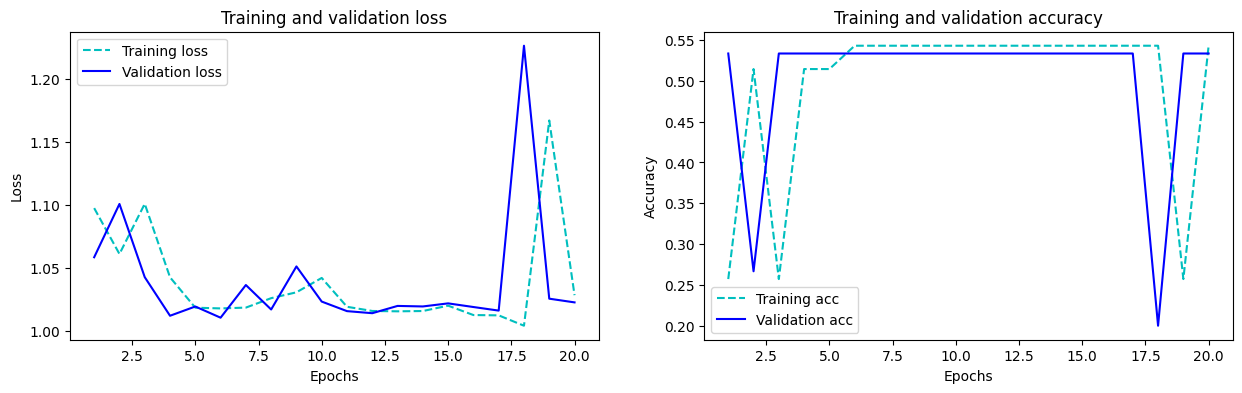

In [169]:
show_result(his)

In [170]:
model.evaluate(x_test_index,y_test)

1/1 [==============================] - 1s 832ms/step - loss: 1.0225 - acc: 0.5333


[1.02254056930542, 0.5333333611488342]

In [171]:
model.predict(x_test_index).argmax(axis=1)


1/1 [==============================] - 2s 2s/step


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [172]:
y_test


array([0, 0, 2, 0, 2, 0, 2, 2, 1, 2, 1, 2, 2, 2, 1], dtype=int64)

In [173]:
model.predict(x_train_index).argmax(axis=1)


2/2 [==============================] - 3s 547ms/step


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [174]:
y_train


array([2, 2, 2, 2, 1, 2, 1, 2, 0, 1, 0, 1, 0, 2, 2, 2, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 1, 2, 1], dtype=int64)